-------------

## **Import Library**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

## **Import Data**

In [3]:
df=pd.read_csv('MPG.csv')

## **Describe Data**

In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [10]:
df=df.dropna()
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## Data Visualization

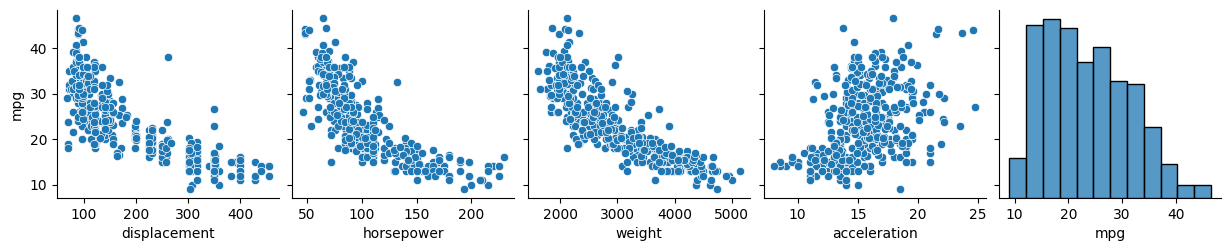

In [11]:
sns.pairplot(df,x_vars=['displacement', 'horsepower', 'weight',
       'acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

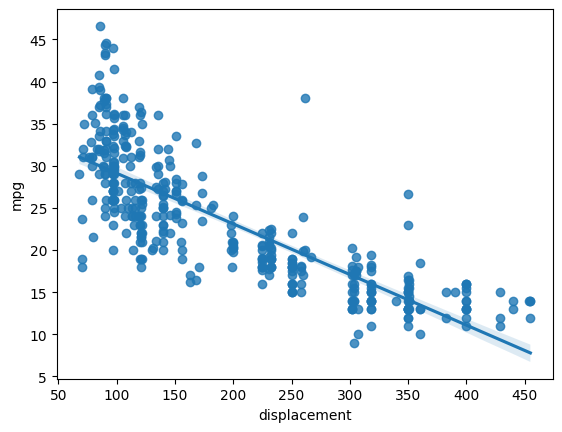

In [12]:
sns.regplot(x='displacement',y='mpg',data=df)

## Data Preprocessing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [15]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Define Target Variable (y) and Feature Variables (X)**

In [16]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [18]:
X=df[['displacement', 'horsepower', 'weight',
       'acceleration']]
X.shape

(392, 4)

In [19]:
Y=df[['mpg']]
Y.shape

(392, 1)

# Scaling Data

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

## **Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=2529)

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((274, 4), (118, 4), (274, 1), (118, 1))

## **Modeling**

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [26]:
lr.intercept_
lr.coef_

array([[-1.05767743, -1.68734727, -4.10787617, -0.11495177]])

## **Prediction**

In [28]:
y_pred=lr.predict(X_test)
y_pred

array([[18.51865637],
       [15.09305675],
       [14.30128789],
       [23.6753321 ],
       [29.7546115 ],
       [23.68796629],
       [26.61066644],
       [24.56692437],
       [15.06260986],
       [11.94312046],
       [24.08050053],
       [27.96518468],
       [31.66130278],
       [31.01309132],
       [18.32428976],
       [19.32795009],
       [28.08847536],
       [32.1506879 ],
       [31.15859692],
       [27.15792144],
       [18.82433097],
       [22.54580176],
       [26.15598115],
       [32.36393869],
       [20.74377679],
       [ 8.78027518],
       [22.19699435],
       [18.20614294],
       [25.00052718],
       [15.26421552],
       [23.13441082],
       [17.10542257],
       [ 9.87180062],
       [30.00790415],
       [20.41204655],
       [29.11860245],
       [24.4305187 ],
       [21.72601835],
       [10.51174626],
       [13.12426391],
       [21.41938406],
       [19.96113872],
       [ 6.19146626],
       [17.79025345],
       [22.5493033 ],
       [29

## Model Accuracy

In [31]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
mean_absolute_error(Y_test,y_pred)

3.3286968643244106

In [32]:
mean_absolute_percentage_error(Y_test,y_pred)

0.14713035779536746

In [33]:
r2_score(Y_test,y_pred)

0.7031250746717691

## Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

lr.fit(X_train2,Y_train)

LinearRegression()

In [48]:
y_pred_poly=lr.predict(X_test2)

## Model Accuracy

In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(Y_test, y_pred_poly)

2.7887147720295977

In [50]:
mean_absolute_percentage_error(Y_test,y_pred_poly)

0.12074018342938687

In [51]:
r2_score(Y_test,y_pred)

0.7031250746717691